In [1]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm.notebook import tqdm

from keras.datasets import mnist

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from scipy.stats import sem

In [2]:
(x_train, y_train), _ = mnist.load_data()

In [3]:
X = np.array([x_train[i].flatten() for i in range(len(x_train)) if y_train[i] in [0, 1]])
y = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] in [0, 1]])

In [4]:
%%capture
u = UMAP()
emb = u.fit_transform(X)

In [5]:
df = pd.DataFrame({
    
    "UMAP1" : emb[:, 0],
    "UMAP2" : emb[:, 1],
    "Digit" : y
    
}
)

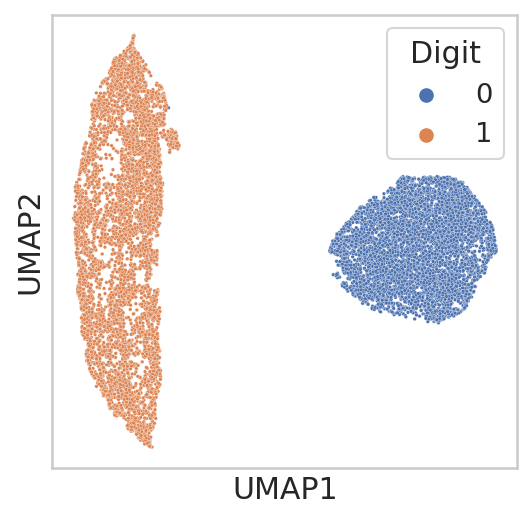

In [9]:
sns.set(style='whitegrid', font_scale=1.2)
rcParams['figure.figsize'] = (4,4)
rcParams['figure.dpi'] = 150
sns.scatterplot(df.sample(frac=1), x='UMAP1', y="UMAP2", hue="Digit", s=3)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
N_trials = 100
scores = []
split = 0.5

for trial in tqdm(range(N_trials)):
    
    inds = np.arange(len(X))
    np.random.shuffle(inds)

    split_index = int(0.5*len(inds))
    
    trains = inds[:split_index]
    vals = inds[split_index:]
    
    clf = LogisticRegression(random_state=0, C=1).fit(X[trains], y[trains])

    scores.append(clf.score(X[vals], y[vals]))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [8]:
print("Mean classification score: %f" %(np.mean(scores)))
print("SEM: %f" %(sem(scores)))

Mean classification score: 0.998399
SEM: 0.000036
